# **ACML Assignment 1 - Backpropagation**
### Jean Janssen, Florent Didascalou

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## ANN Class

For the experiments were are using a simple neural network class that keeps track of the structure and weights of the network as well as provides some functions for feedforward for getting model outputs and backprop for training.

To use this class simply create an instance of Ann by passing a list (layers) representing the structure of the neural network, as well as the learning rate parameter.

In [3]:
class Ann:

    def __init__(self, layers, learning_rate):
        self.hidden_weights = np.random.rand(layers[0], layers[1])
        self.hidden_bias = np.random.rand(1,layers[1])
        self.output_weights = np.random.rand(layers[1], layers[2])
        self.output_bias = np.random.rand(1,layers[2])
        self.alpha = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self, input):
        hidden_act = self.sigmoid(np.matmul(input, self.hidden_weights) + self.hidden_bias)
        return hidden_act, self.sigmoid(np.matmul(hidden_act, self.output_weights) + self.output_bias)
    
    def backprop(self, data, epochs):
        loss_history = list() # History of Losses for each training epoch
        n = len(data) # Number of training samples
        input = data
        
        for epoch in range(epochs):
            cumulative_loss = 0
            
            # Calculating activations for each layer
            hidden_activation, output_activation = self.feedforward(input)

            # Calculating Loss for the epoch
            loss = output_activation - input
            cumulative_loss += np.sum(np.abs(loss)) / n

            # Calculating Deltas for output and hidden layer
            delta_out = output_activation * (1- output_activation) * loss

            delta_hidden = hidden_activation * (1- hidden_activation) * (np.matmul(delta_out, self.hidden_weights))


            # Updating the weights
            self.output_weights -= self.alpha * (1/n) * np.dot(np.transpose(hidden_activation), delta_out)
            self.hidden_weights -= self.alpha * (1/n) * np.dot(np.transpose(input), delta_hidden)

            self.output_bias -= self.alpha * (1/n) * np.sum(delta_out, axis=0)
            self.hidden_bias -= self.alpha * (1/n) * np.sum(delta_hidden, axis=0)

            
            if epoch % 5000 == 0:
                print(f"Current epoch: {epoch}, cumulative loss: {cumulative_loss}")
            loss_history.append(cumulative_loss)

        

        return loss_history


In [4]:
### Same as Ann class, but allows for specifying the range over which weights
### are initialized
class Ann2:
    def __init__(self, layers, learning_rate, weight_range):
        self.hidden_weights = np.random.uniform(weight_range[0],weight_range[1],(layers[0], layers[1]))
        self.hidden_bias = np.random.uniform(weight_range[0],weight_range[1],(1,layers[1]))
        self.output_weights = np.random.uniform(weight_range[0],weight_range[1],(layers[1], layers[2]))
        self.output_bias = np.random.uniform(weight_range[0],weight_range[1],(1,layers[2]))
        self.alpha = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self, input):
        hidden_act = self.sigmoid(np.matmul(input, self.hidden_weights) + self.hidden_bias)
        return hidden_act, self.sigmoid(np.matmul(hidden_act, self.output_weights) + self.output_bias)
    
    def backprop(self, data, epochs):
        loss_history = list() # History of Losses for each training epoch
        n = len(data) # Number of training samples
        input = data

        for epoch in range(epochs):
            cumulative_loss = 0
            
            # Calculating activations for each layer
            hidden_activation, output_activation = self.feedforward(input)

            # Calculating Loss for the epoch
            loss = output_activation - input
            cumulative_loss += np.sum(np.abs(loss)) / n

            # Calculating Deltas for output and hidden layer
            delta_out = output_activation * (1- output_activation) * loss

            delta_hidden = hidden_activation * (1- hidden_activation) * (np.matmul(delta_out, self.hidden_weights))


            # Updating the weights
            self.output_weights -= self.alpha * (1/n) * np.dot(np.transpose(hidden_activation), delta_out)
            self.hidden_weights -= self.alpha * (1/n) * np.dot(np.transpose(input), delta_hidden)

            self.output_bias -= self.alpha * (1/n) * np.sum(delta_out, axis=0)
            self.hidden_bias -= self.alpha * (1/n) * np.sum(delta_hidden, axis=0)

            
            if epoch % 5000 == 0:
                print(f"Current epoch: {epoch}, cumulative loss: {cumulative_loss}")
            loss_history.append(cumulative_loss)

        

        return loss_history


In [4]:
### Old Version Don't run this cell
class Ann:

    def __init__(self, layers, learning_rate):
        self.hidden_weights = np.random.random((layers[0], layers[1]))
        self.hidden_bias = np.random.random((1,layers[1]))
        self.output_weights = np.random.random((layers[1], layers[2]))
        self.output_bias = np.random.random((1,layers[2]))
        self.alpha = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self, input):
        hidden_act = self.sigmoid(np.matmul(input, self.hidden_weights) + self.hidden_bias)
        return self.sigmoid(np.matmul(hidden_act, self.output_weights) + self.output_bias)
    
    def backprop(self, data, epochs):
        loss_history = list() # History of Losses for each training epoch
        n = len(data) # Number of training samples
        input = data

        for epoch in range(epochs):
            cumulative_loss = 0
            
            # Calculating activations for each layer
            hidden_activation = self.sigmoid(np.matmul(input, self.hidden_weights) + self.hidden_bias)
            output_activation = self.sigmoid(np.matmul(hidden_activation, self.output_weights) + self.output_bias)

            # Calculating Loss for the epoch
            loss = output_activation - input
            cumulative_loss += np.sum(np.abs(loss)) / n

            # Calculating Deltas for both layers
            delta_out = output_activation * (1- output_activation) * loss

            delta_hidden = hidden_activation * (1- hidden_activation) * (np.matmul(delta_out, self.hidden_weights))


            # Updating the weights
            self.output_weights -= self.alpha * (1/n) * np.dot(np.transpose(hidden_activation), delta_out)
            self.hidden_weights -= self.alpha * (1/n) * np.dot(np.transpose(input), delta_hidden)

            self.output_bias -= self.alpha * (1/n) * np.sum(delta_out, axis=0)
            self.hidden_bias -= self.alpha * (1/n) * np.sum(delta_hidden, axis=0)

            
            if epoch % 5000 == 0:
                print(f"Current epoch: {epoch}, cumulative loss: {cumulative_loss}")
            loss_history.append(cumulative_loss)

        

        return loss_history


In [19]:
### This cell contains all necessary variables for creating, 
### training and evaluating an instance of an Ann or Ann2 object
data = np.array([[1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1]])

learning_rate = 3
epochs = 50000
Ann_structure = [8, 3, 8]

## Model Training
In the next cell we create the model and train it on the inputs defined in the previous cell

In [20]:
my_network = Ann(Ann_structure, learning_rate)

loss_hist = my_network.backprop(data, epochs)

Current epoch: 0, cumulative loss: 6.0466084297258975
Current epoch: 5000, cumulative loss: 0.1811496262500526
Current epoch: 10000, cumulative loss: 0.12127592667648066
Current epoch: 15000, cumulative loss: 0.09696131403706948
Current epoch: 20000, cumulative loss: 0.08300704592265583
Current epoch: 25000, cumulative loss: 0.07369383941887805
Current epoch: 30000, cumulative loss: 0.06692086716252177
Current epoch: 35000, cumulative loss: 0.06171346566567498
Current epoch: 40000, cumulative loss: 0.05755034933875627
Current epoch: 45000, cumulative loss: 0.05412440939789297


## Results

Last epoch training loss: 0.05124206036978633
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.985 0.003 0.008 0.    0.004 0.    0.    0.   ]
 [0.009 0.982 0.    0.012 0.009 0.    0.01  0.   ]
 [0.012 0.    0.983 0.009 0.    0.014 0.    0.006]
 [0.002 0.011 0.01  0.984 0.    0.008 0.    0.   ]
 [0.01  0.007 0.    0.    0.984 0.    0.007 0.009]
 [0.    0.    0.01  0.008 0.    0.975 0.012 0.01 ]
 [0.    0.015 0.    0.    0.01  0.015 0.982 0.   ]
 [0.    0.    0.009 0.    0.012 0.009 0.    0.986]]


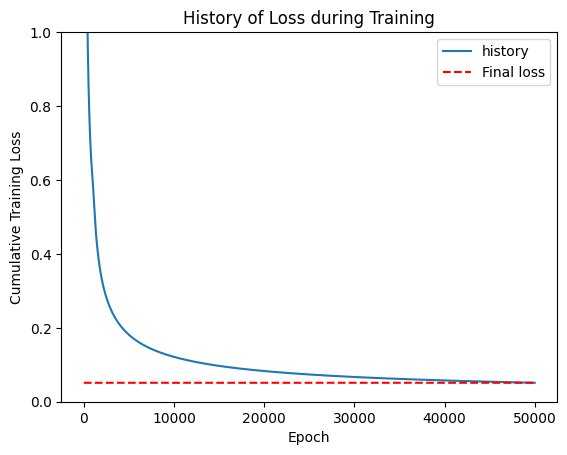

In [21]:
final_output = my_network.feedforward(data)

print(f"Last epoch training loss: {loss_hist[-1]}")

print("Training Set")
print(data)

print("Predictions of Trained Model on Training Set:")
print(np.round(final_output[1], 3))

plt.figure()
plt.plot(np.arange(epochs), loss_hist, label="history")
plt.plot(np.arange(epochs), np.repeat(loss_hist[-1], epochs), 'r--', label="Final loss")
plt.ylim(0,1)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Cumulative Training Loss")
plt.title("History of Loss during Training")
plt.show()

## Experiments

### Experiment 1: Learning rate

Current learning rate: 5
Current epoch: 0, cumulative loss: 5.983741357213294
Current epoch: 5000, cumulative loss: 0.14376776537804373
Current epoch: 10000, cumulative loss: 0.09821508351368004
Current epoch: 15000, cumulative loss: 0.07912449909917353
Current epoch: 20000, cumulative loss: 0.06801582767244677
Current epoch: 25000, cumulative loss: 0.060541400696083936
Current epoch: 30000, cumulative loss: 0.05507609343721327
Current epoch: 35000, cumulative loss: 0.05085759967283478
Current epoch: 40000, cumulative loss: 0.04747503306626698
Current epoch: 45000, cumulative loss: 0.04468490536751941
Last epoch training loss: 0.04233303700207614
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.988 0.009 0.    0.009 0.005 0.008 0.    0.   ]
 [0.005 0.982 0.    0.007 0.011 0.    0.01  0.   ]
 [0.    0.    0.987 0.    0.009

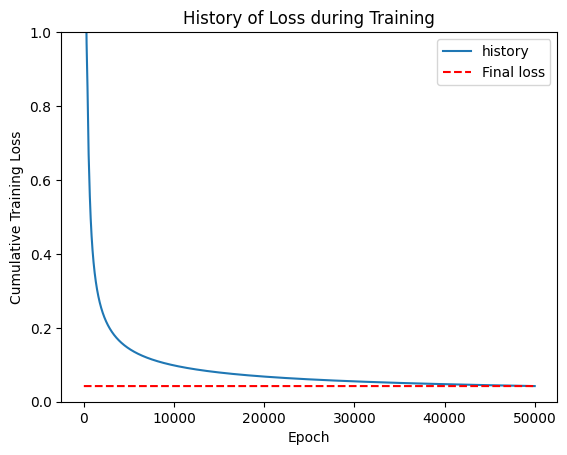

Current learning rate: 10
Current epoch: 0, cumulative loss: 5.877352536981678
Current epoch: 5000, cumulative loss: 0.09042831456152008
Current epoch: 10000, cumulative loss: 0.0625179660309685
Current epoch: 15000, cumulative loss: 0.05058699365240894
Current epoch: 20000, cumulative loss: 0.04358408521897188
Current epoch: 25000, cumulative loss: 0.038849119242691604
Current epoch: 30000, cumulative loss: 0.03537599041888508
Current epoch: 35000, cumulative loss: 0.03268928327450539
Current epoch: 40000, cumulative loss: 0.030531452447799465
Current epoch: 45000, cumulative loss: 0.02874931484816341
Last epoch training loss: 0.027245602972333118
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.994 0.006 0.001 0.    0.004 0.005 0.    0.   ]
 [0.004 0.992 0.004 0.005 0.    0.    0.006 0.   ]
 [0.    0.003 0.99  0.008 0. 

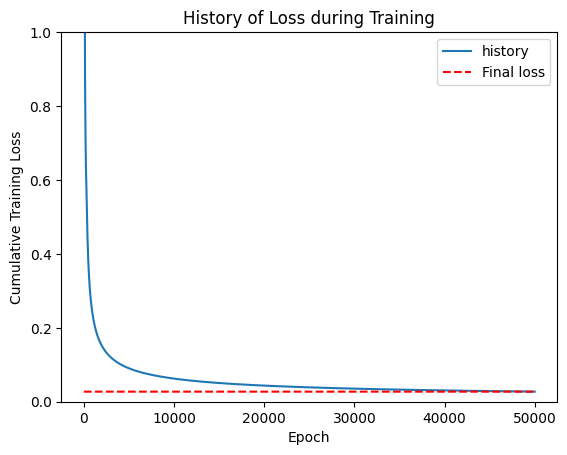

Current learning rate: 20
Current epoch: 0, cumulative loss: 5.9608099896891265
Current epoch: 5000, cumulative loss: 0.0586979146568435
Current epoch: 10000, cumulative loss: 0.040899902549044485
Current epoch: 15000, cumulative loss: 0.03319023950054457
Current epoch: 20000, cumulative loss: 0.028640412333733167
Current epoch: 25000, cumulative loss: 0.0255541887008652
Current epoch: 30000, cumulative loss: 0.023285479809164858
Current epoch: 35000, cumulative loss: 0.02152767225481005
Current epoch: 40000, cumulative loss: 0.0201141580255415
Current epoch: 45000, cumulative loss: 0.018945611252276454
Last epoch training loss: 0.017958847578072354
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.993 0.    0.    0.    0.006 0.    0.004 0.004]
 [0.    0.995 0.    0.004 0.    0.    0.004 0.004]
 [0.    0.    0.993 0.003 0.

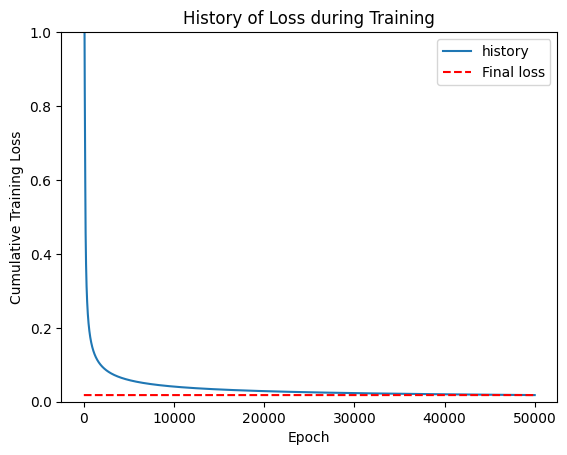

Current learning rate: 40
Current epoch: 0, cumulative loss: 5.818084769215025
Current epoch: 5000, cumulative loss: 0.044889726584365214
Current epoch: 10000, cumulative loss: 0.031067985880328657
Current epoch: 15000, cumulative loss: 0.025183369360335613
Current epoch: 20000, cumulative loss: 0.021729676493541638
Current epoch: 25000, cumulative loss: 0.019392821184567977
Current epoch: 30000, cumulative loss: 0.017677201085865207
Current epoch: 35000, cumulative loss: 0.0163488701444093
Current epoch: 40000, cumulative loss: 0.015281125489722415
Current epoch: 45000, cumulative loss: 0.014398598031468375
Last epoch training loss: 0.013653417099035708
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.996 0.003 0.002 0.    0.    0.    0.003 0.003]
 [0.002 0.995 0.002 0.    0.    0.002 0.    0.   ]
 [0.    0.003 0.995 0.0

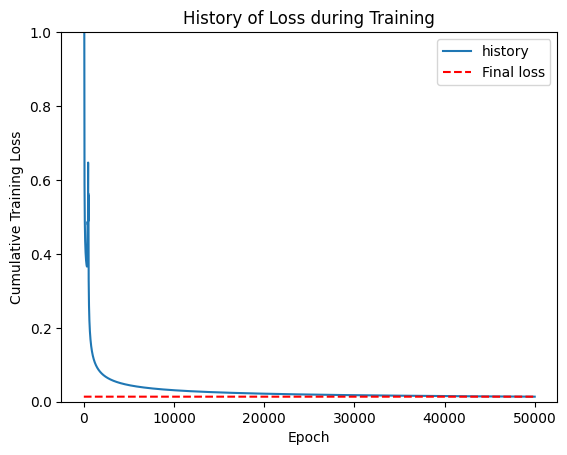

Current learning rate: 80
Current epoch: 0, cumulative loss: 6.0353496352467415
Current epoch: 5000, cumulative loss: 0.508570934337671
Current epoch: 10000, cumulative loss: 0.5056783048600131
Current epoch: 15000, cumulative loss: 0.5045876356219863
Current epoch: 20000, cumulative loss: 0.5039669033773917
Current epoch: 25000, cumulative loss: 0.5035609631395603
Current epoch: 30000, cumulative loss: 0.38094852807449503
Current epoch: 35000, cumulative loss: 0.37940663146113374
Current epoch: 40000, cumulative loss: 0.37871081464510925
Current epoch: 45000, cumulative loss: 0.37828705021753894
Last epoch training loss: 0.37799260510202704
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.    0.    0.001 0.    0.    0.    0.    0.   ]
 [0.    0.999 0.001 0.    0.    0.002 0.    0.   ]
 [0.    0.001 0.998 0.    0.    0.  

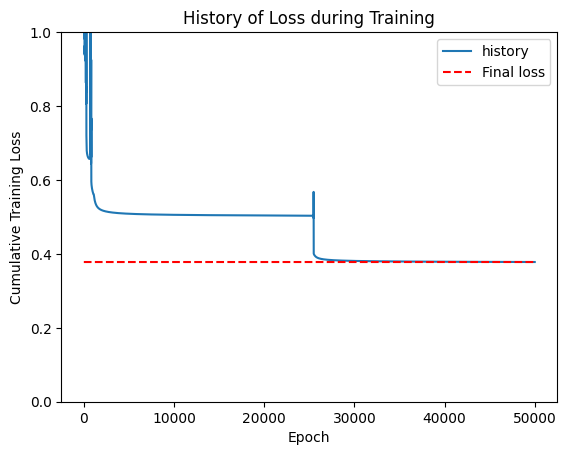

In [8]:
learning_rates = [5, 10, 20, 40, 80]

for l in learning_rates:
    print(f"Current learning rate: {l}")
    my_network = Ann(Ann_structure, l)

    loss_hist = my_network.backprop(data, epochs)

    final_output = my_network.feedforward(data)

    print(f"Last epoch training loss: {loss_hist[-1]}")

    print("Training Set")
    print(data)

    print("Predictions of Trained Model on Training Set:")
    print(np.round(final_output[1], 3))

    plt.figure()
    plt.plot(np.arange(epochs), loss_hist, label="history")
    plt.plot(np.arange(epochs), np.repeat(loss_hist[-1], epochs), 'r--', label="Final loss")
    plt.ylim(0,1)
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Cumulative Training Loss")
    plt.title("History of Loss during Training")
    plt.show()
    

When increasing the learning rate we can see that the final loss gets lower up until a certain turning point where we can see that that the loss function starts to oscillate. In addition the final training loss has a higher value than with a lower learning rate. Through means of experimentation with the learning rate we can see here that optimal learning rate for this neural network lies around 40.

### Experiment 2: Add multiple instances of one possible combination to dataset

Current epoch: 0, cumulative loss: 6.174099634375623
Current epoch: 5000, cumulative loss: 0.040512060906084814
Current epoch: 10000, cumulative loss: 0.026814611611760936
Current epoch: 15000, cumulative loss: 0.021562826096197116
Current epoch: 20000, cumulative loss: 0.018580654145889622
Current epoch: 25000, cumulative loss: 0.016576705109903056
Current epoch: 30000, cumulative loss: 0.015106230480351228
Current epoch: 35000, cumulative loss: 0.01396686206359736
Current epoch: 40000, cumulative loss: 0.013050267393057187
Current epoch: 45000, cumulative loss: 0.012292189850982845
Last epoch training loss: 0.011651810783359315
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Mo

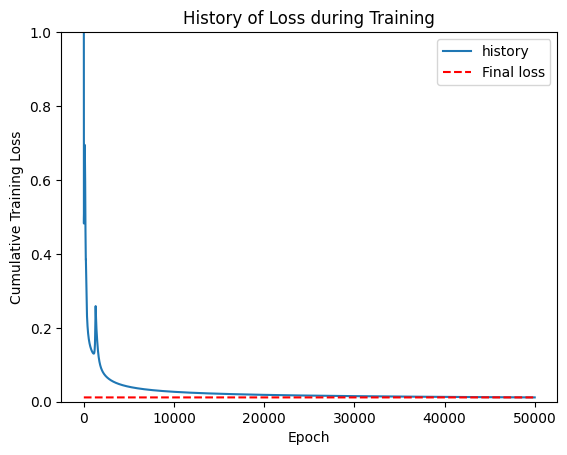

In [12]:
learning_rate = 40

data2 = np.array([[1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1]])

my_network = Ann(Ann_structure, learning_rate)

loss_hist = my_network.backprop(data2, epochs)

final_output = my_network.feedforward(data2)

print(f"Last epoch training loss: {loss_hist[-1]}")

print("Training Set")
print(data2)

print("Predictions of Trained Model on Training Set:")
print(np.round(final_output[1], 3))

plt.figure()
plt.plot(np.arange(epochs), loss_hist, label="history")
plt.plot(np.arange(epochs), np.repeat(loss_hist[-1], epochs), 'r--', label="Final loss")
plt.ylim(0,1)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Cumulative Training Loss")
plt.title("History of Loss during Training")
plt.show()

When adding more instances of the same learning example the neural network does not seem to be affected by this. What is interesting to note is that more oscillations occur when a specific learning example is repeated more often when comparing the results of the loss functions with this dataset with repitions when compared to the dataset without the repititions.

### Experiment 3: Varying initial weights

Current epoch: 0, cumulative loss: 4.636114526832147
Current epoch: 5000, cumulative loss: 0.048214892957312856
Current epoch: 10000, cumulative loss: 0.03372067547667708
Current epoch: 15000, cumulative loss: 0.027440910533664452
Current epoch: 20000, cumulative loss: 0.023734619057549478
Current epoch: 25000, cumulative loss: 0.021219765733296335
Current epoch: 30000, cumulative loss: 0.01937006114716878
Current epoch: 35000, cumulative loss: 0.017935864043046715
Current epoch: 40000, cumulative loss: 0.01678159696396998
Current epoch: 45000, cumulative loss: 0.01582647581241315
Last epoch training loss: 0.015019136750005276
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.995 0.    0.004 0.001 0.    0.    0.003 0.003]
 [0.    0.994 0.004 0.    0.    0.002 0.005 0.   ]
 [0.004 0.004 0.993 0.003 0.    0.002 0.    0.   ]


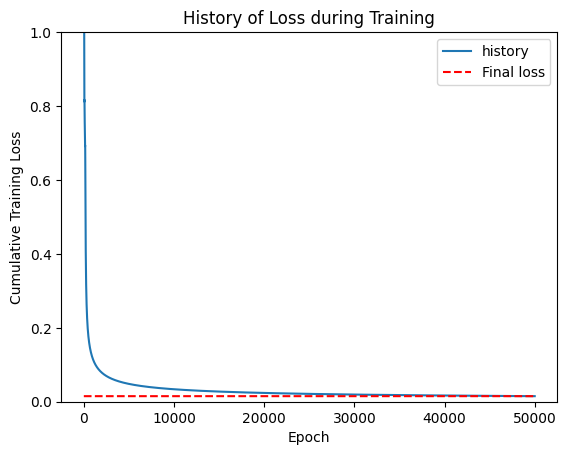

Current epoch: 0, cumulative loss: 4.481822958439924
Current epoch: 5000, cumulative loss: 0.6423545609259841
Current epoch: 10000, cumulative loss: 0.6367621821048484
Current epoch: 15000, cumulative loss: 0.6345599109618248
Current epoch: 20000, cumulative loss: 0.6333628567852767
Current epoch: 25000, cumulative loss: 0.6326685731490931
Current epoch: 30000, cumulative loss: 0.6324220793729177
Current epoch: 35000, cumulative loss: 0.5833897550958034
Current epoch: 40000, cumulative loss: 0.5085919459548162
Current epoch: 45000, cumulative loss: 0.5074496978104962
Last epoch training loss: 0.5067654474887859
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.997 0.    0.    0.003 0.    0.    0.    0.003]
 [0.    0.997 0.    0.002 0.    0.001 0.    0.004]
 [0.    0.001 0.    0.001 0.    0.    0.    0.   ]
 [0.003 0.001 0.

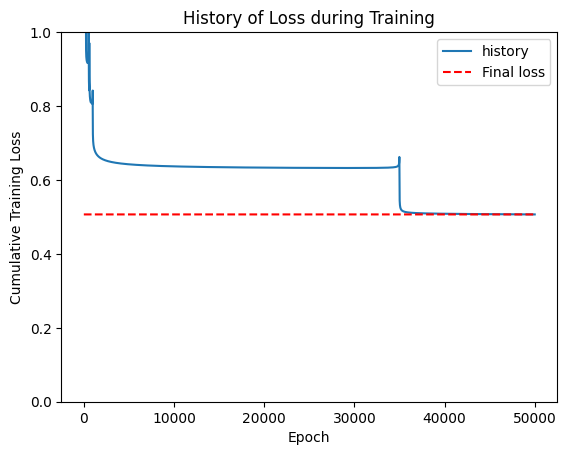

Current epoch: 0, cumulative loss: 6.999999986225337
Current epoch: 5000, cumulative loss: 6.9999999861608195
Current epoch: 10000, cumulative loss: 6.9999999860956805
Current epoch: 15000, cumulative loss: 6.999999986029909
Current epoch: 20000, cumulative loss: 6.999999985963495
Current epoch: 25000, cumulative loss: 6.999999985896432
Current epoch: 30000, cumulative loss: 6.999999985828707
Current epoch: 35000, cumulative loss: 6.999999985760313
Current epoch: 40000, cumulative loss: 6.999999985691237
Current epoch: 45000, cumulative loss: 6.999999985621472
Last epoch training loss: 6.999999985551019
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1

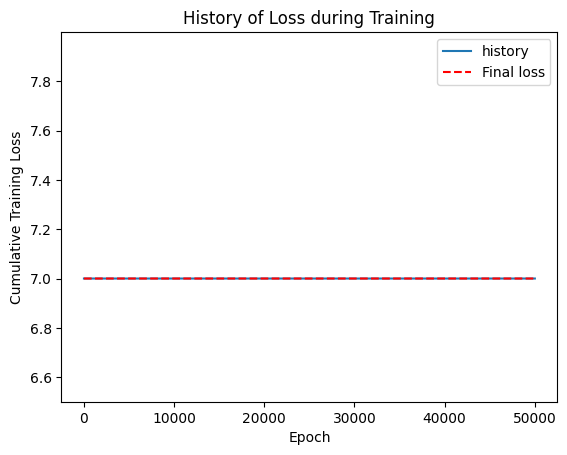

Current epoch: 0, cumulative loss: 1.2858734408086328
Current epoch: 5000, cumulative loss: 1.123118800157039
Current epoch: 10000, cumulative loss: 1.1168862146260878
Current epoch: 15000, cumulative loss: 0.7631325271659064
Current epoch: 20000, cumulative loss: 0.7578538581926917
Current epoch: 25000, cumulative loss: 0.6458108282065522
Current epoch: 30000, cumulative loss: 0.6389152537996262
Current epoch: 35000, cumulative loss: 0.6361741067483137
Current epoch: 40000, cumulative loss: 0.6346116579538043
Current epoch: 45000, cumulative loss: 0.6335716689600794
Last epoch training loss: 0.6328162438624065
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.993 0.001 0.001 0.006 0.001 0.001 0.    0.001]
 [0.    0.    0.    0.    0.    0.    0.002 0.   ]
 [0.001 0.    0.    0.    0.    0.    0.    0.   ]
 [0.007 0.    0.

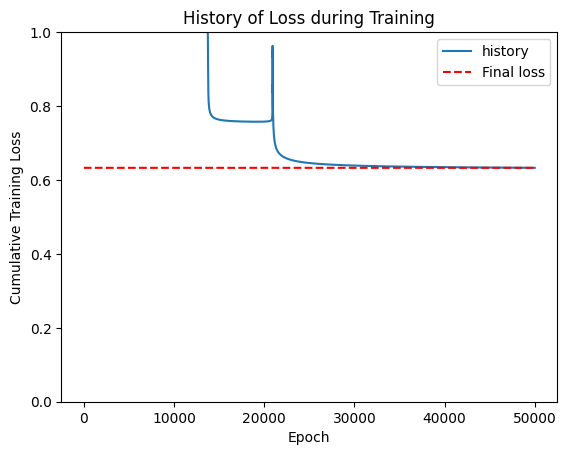

Current epoch: 0, cumulative loss: 7.0
Current epoch: 5000, cumulative loss: 7.0
Current epoch: 10000, cumulative loss: 7.0
Current epoch: 15000, cumulative loss: 7.0
Current epoch: 20000, cumulative loss: 7.0
Current epoch: 25000, cumulative loss: 7.0
Current epoch: 30000, cumulative loss: 7.0
Current epoch: 35000, cumulative loss: 7.0
Current epoch: 40000, cumulative loss: 7.0
Current epoch: 45000, cumulative loss: 7.0
Last epoch training loss: 7.0
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


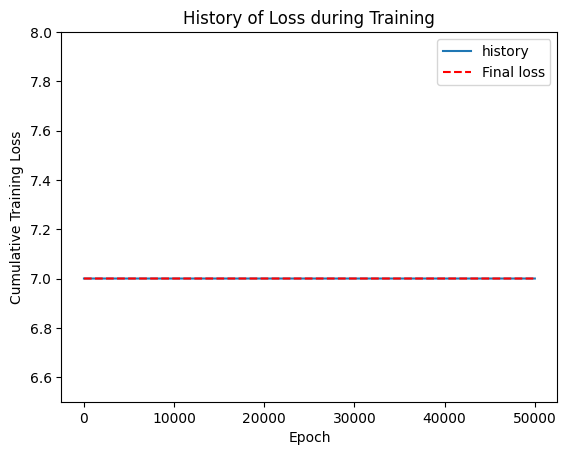

Current epoch: 0, cumulative loss: 1.0
Current epoch: 5000, cumulative loss: 1.0
Current epoch: 10000, cumulative loss: 1.0
Current epoch: 15000, cumulative loss: 1.0
Current epoch: 20000, cumulative loss: 1.0
Current epoch: 25000, cumulative loss: 1.0
Current epoch: 30000, cumulative loss: 1.0
Current epoch: 35000, cumulative loss: 1.0
Current epoch: 40000, cumulative loss: 1.0
Current epoch: 45000, cumulative loss: 1.0
Last epoch training loss: 1.0
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


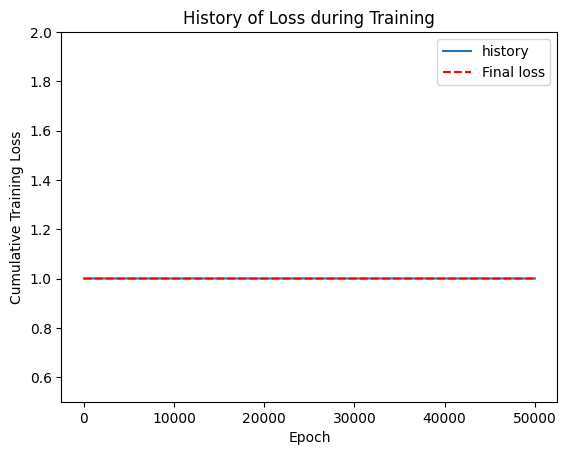

C:\Users\flore\AppData\Local\Temp\ipykernel_10108\3325253992.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Current epoch: 0, cumulative loss: 3.75
Current epoch: 5000, cumulative loss: 3.75
Current epoch: 10000, cumulative loss: 3.75
Current epoch: 15000, cumulative loss: 3.75
Current epoch: 20000, cumulative loss: 3.75
Current epoch: 25000, cumulative loss: 3.75
Current epoch: 30000, cumulative loss: 3.75
Current epoch: 35000, cumulative loss: 3.75
Current epoch: 40000, cumulative loss: 3.75
Current epoch: 45000, cumulative loss: 3.75
Last epoch training loss: 3.75
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[1. 0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 1. 0. 0.]]


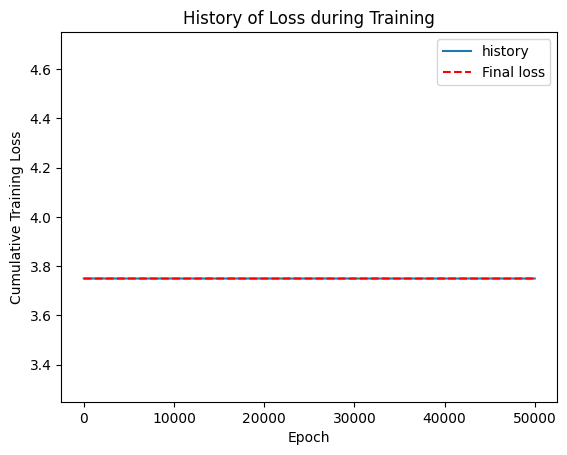

In [17]:
ranges = [[-1,1],
        [-10,10],
        [0,10],
        [-10,0],
        [100,110],
        [-110,-100],
        [-1000,1000]]

learning_rate = 30

for weight_range in ranges:
        network = Ann2(Ann_structure, learning_rate, weight_range)

        loss_hist = network.backprop(data, epochs)

        final_output = network.feedforward(data)

        print(f"Last epoch training loss: {loss_hist[-1]}")

        print("Training Set")
        print(data)

        print("Predictions of Trained Model on Training Set:")
        print(np.round(final_output[1], 3))

        plt.figure()
        plt.plot(np.arange(epochs), loss_hist, label="history")
        plt.plot(np.arange(epochs), np.repeat(loss_hist[-1], epochs), 'r--', label="Final loss")
        lower = 0
        upper = 1
        if (not loss_hist[-1] < 1):
                lower = loss_hist[-1]-0.5
                upper = loss_hist[-1]+1
        plt.ylim(lower, upper)
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Cumulative Training Loss")
        plt.title("History of Loss during Training")
        plt.show()

From these results we can clearly see that the initialization of the network weights have a significant impact on the final result. A range of -1 to 1 is best and it appears that after training the network will always find the best solution (loss < 0.1). Whereas for -10,10 the model only sometimes finds the best solution after training. It is interesting to note that for ranges where the weights are initialized with very large magnitudes (>=100), it appears that the solution reached after training will not be optimal. In the cases [-110,-100] and [100,110], the model appears to converge imediately, only returning the same output regardless of input.

### Interpretation of Results

C:\Users\flore\AppData\Local\Temp\ipykernel_10108\1532184688.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


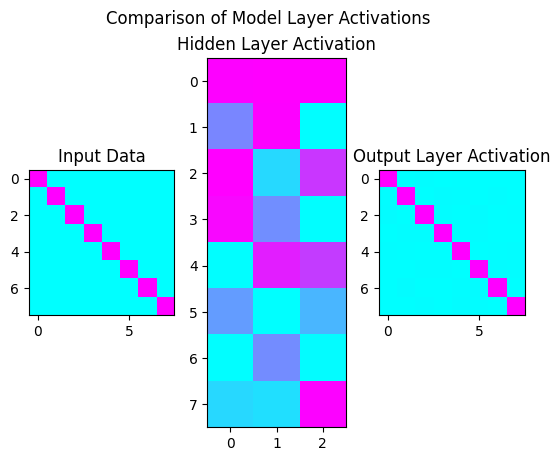

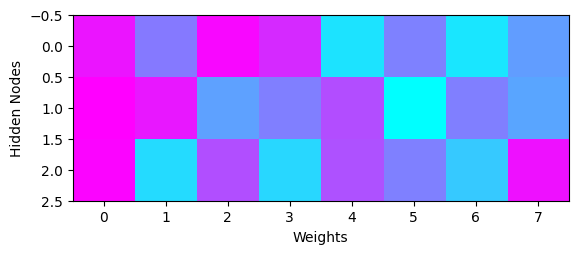

In [47]:
final_out = my_network.feedforward(data)

fig, ax = plt.subplots(1,3)
fig.suptitle("Comparison of Model Layer Activations")
ax[0].imshow(data, norm="linear", cmap="cool")
ax[0].set_title("Input Data")
ax[1].imshow(final_out[0], norm="linear", cmap="cool")
ax[1].set_title("Hidden Layer Activation")
ax[2].imshow(final_out[1], norm="linear", cmap="cool")
ax[2].set_title("Output Layer Activation")
fig.show()

plt.figure()
plt.imshow(my_network.hidden_weights.T, cmap="cool")


plt.xlabel("Weights")
plt.ylabel("Hidden Nodes")


plt.show()

Here the first set of three images are a normalized visual representation of the input data, and the activation of the hidden and output layers in the network. From this we can see that the hidden layer in the network encodes a representation of the input as three values which are then decoded by the output layer to be the same as the input. For example in the case of input [1,0,0,0,0,0,0,0], all three nodes in the hidden layer have high activation, whereas when the input is [0,0,0,0,0,1,0,0], the first and third hidden neuron have medium activation and the second hidden neuron has almostno activation. Different combinations of activation of the three hidden neurons correspond to a certain output activation. In this case, Since there are only 8 possible unique inputs, 3 hidden neurons which have activations that can range of all real values, are more than enough to perfectly represent the possible inputs which are then decoded by the output layer.